# Adversarial Attack

In [1]:
from auxiliar_code import *

Using TensorFlow backend.


### Load and show Images

In [2]:
original_image = load_image("water_bottle.jpg")
hacked_image = load_image("hacked_water.png")

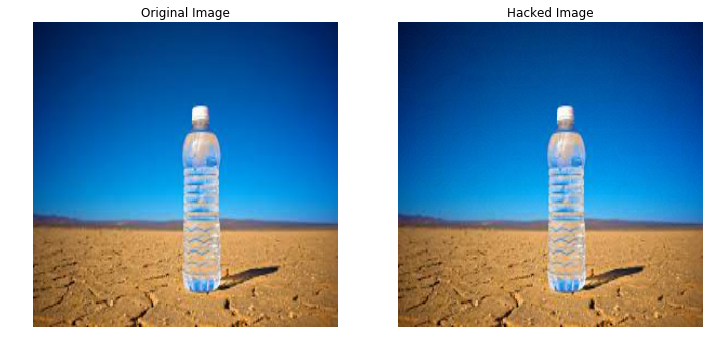

In [3]:
plot_images_contrast(original_image, hacked_image)

### Load Inception Neural Network

In [4]:
nn = load_neural_network("inception")

### Predict

In [5]:
predict(nn, original_image)

water_bottle


In [6]:
predict(nn, hacked_image)

beer_glass


### Explanation

#### Class to attack

In [7]:
target_class = 441 # Beer Glass Class
# Classes: https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a

#### Gradients and Loss Function

In [8]:
im = preprocess_image(original_image)

inp_layer = nn.layers[0].input # Image
out_layer = nn.layers[-1].output # Probabilities

loss = out_layer[0, target_class]
grad = K.gradients(loss, inp_layer)[0]
optimize_gradient = K.function([inp_layer, K.learning_phase()], [grad, loss])

#### Create the Adversarial Image

In [9]:
%%time
certainty = 0.0

# Adv image should be similar to the original
max_pert = im + 0.01
min_pert = im - 0.01

adv = np.copy(im)

images = []

while certainty < 0.95:
    gr, certainty = optimize_gradient([adv, 0])
    adv += gr
    adv = np.clip(adv, min_pert, max_pert)
    adv = np.clip(adv, -1 , 1)
    images.append(denormalise(np.copy(im))-denormalise(np.copy(adv)))
    print("Certainty Degree", certainty)

Certainty Degree 9.625923e-05
Certainty Degree 9.7882476e-05
Certainty Degree 9.952359e-05
Certainty Degree 0.00010118452
Certainty Degree 0.000102900354
Certainty Degree 0.0001046872
Certainty Degree 0.000106534106
Certainty Degree 0.00010842447
Certainty Degree 0.00011031709
Certainty Degree 0.00011219435
Certainty Degree 0.00011409041
Certainty Degree 0.0001160178
Certainty Degree 0.00011797455
Certainty Degree 0.000119984725
Certainty Degree 0.00012203609
Certainty Degree 0.0001241051
Certainty Degree 0.00012624152
Certainty Degree 0.00012841323
Certainty Degree 0.00013059916
Certainty Degree 0.00013279605
Certainty Degree 0.00013500352
Certainty Degree 0.00013725806
Certainty Degree 0.0001395935
Certainty Degree 0.000141992
Certainty Degree 0.00014441594
Certainty Degree 0.00014682939
Certainty Degree 0.00014926413
Certainty Degree 0.00015171237
Certainty Degree 0.00015419957
Certainty Degree 0.00015673933
Certainty Degree 0.00015932317
Certainty Degree 0.00016195899
Certainty Deg

### Trick Summary

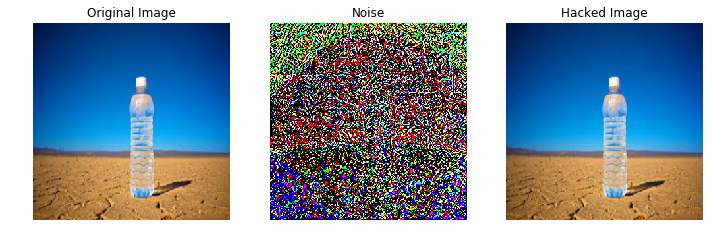

In [12]:
im = denormalise(im.reshape(im.shape[1], im.shape[2], im.shape[3]))
adv = denormalise(adv.reshape(adv.shape[1], adv.shape[2], adv.shape[3]))
plot_images_noise(im, adv)

## Save the Adv Image

In [13]:
# It would be recommended to point the NN hacked
matplotlib.image.imsave('hacked_water_inception.png', adv)

## Save GIF Attack

In [14]:
images_den = []
for i, image in enumerate(images):
    if i% 10 == 0:
        images_den.append(image.reshape(image.shape[1], image.shape[2], image.shape[3]))
imageio.mimsave('attack.gif', images_den)

## Try again

In [25]:
decode_predictions(nn.predict(preprocess_input(adv.reshape(1, adv.shape[0], adv.shape[1], adv.shape[2]))))

[[('n02823750', 'beer_glass', 0.99882895),
  ('n02823428', 'beer_bottle', 0.0006646357),
  ('n02815834', 'beaker', 7.791003e-05),
  ('n03443371', 'goblet', 7.453721e-05),
  ('n03983396', 'pop_bottle', 4.9831186e-05)]]